## Loading Dependencies

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

## Loading Dataset

In [39]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

## 1) Understanding and pre-processing the dataset

In [40]:
print("Training set shape: ", x_train.shape)
print("Testing set shape: ", x_test.shape)

Training set shape:  (50000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


### a) Display the number of classes

In [41]:
unq_class, counts = np.unique(y_train, return_counts = True)
print("There are", len(unq_class), "output classes, with labels: ", unq_class)

There are 10 output classes, with labels:  [0 1 2 3 4 5 6 7 8 9]


In [42]:
print("The distribution of the class labels in the training set is: ", counts)

The distribution of the class labels in the training set is:  [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [43]:
#Trainning set is balanced

### b) display dimension of each image

In [44]:
print("Dimensions of image = ", x_train[0].shape) ##Dimension found by finding the shape of one random image

Dimensions of image =  (32, 32, 3)


### c) Dislaying one image for each class

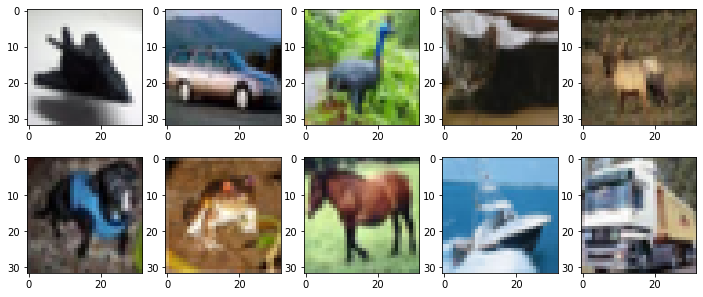

In [45]:
(x, id) = np.unique(y_train, return_index = True)
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[id[i]])

### d) Normalization

In [46]:
#Normalizing the pixel values to (0,1) by dividing by 255.0(the current upper limit of pixel values)
x_train = x_train/255.0
x_test = x_test/255.0

## 2) Performing experiments on Fully Connected Neural Networks

### a) Model building

In [47]:
model_fcnn = tf.keras.Sequential()
model_fcnn.add(tf.keras.layers.Input(shape = (32, 32, 3))) ##Input layer shape corresponds to the image dimensions
model_fcnn.add(tf.keras.layers.Flatten()) ## We must flatten the image before passing it to the dense layers
model_fcnn.add(tf.keras.layers.Dense(512, activation = "relu")) ## First hidden layer with 512 neurons
model_fcnn.add(tf.keras.layers.Dense(256, activation = "relu")) ## Second hidden layer with 256 neurons
model_fcnn.add(tf.keras.layers.Dense(128, activation = "relu")) ## Third hidden layer with 128 neurons
model_fcnn.add(tf.keras.layers.Dense(100, activation = "relu")) ## Fourth hidden layer with 100 neurons
model_fcnn.add(tf.keras.layers.Dense(10, activation = "softmax")) ## Ouput layer with 10 neurons corresponding to the 10 output classes

In [48]:
#Summary of the built FCNN model
model_fcnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,751,510 (6.68 MB)

 Trainable params: 1,751,510 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_fcnn.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) ##Loss function is sparse categorical cross-entropy since the output labels are numeric

### b) Train and test the network

In [50]:
#Setting up the hyperparameters
batch_size = 32
epochs = 15

#Fitting the model
res_fcnn = model_fcnn.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.2433 - loss: 2.0383 - val_accuracy: 0.3654 - val_loss: 1.7599
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3733 - loss: 1.7344 - val_accuracy: 0.4066 - val_loss: 1.6635
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.4078 - loss: 1.6432 - val_accuracy: 0.4122 - val_loss: 1.6544
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.4308 - loss: 1.5828 - val_accuracy: 0.4298 - val_loss: 1.5750
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.4469 - loss: 1.5269 - val_accuracy: 0.4394 - val_loss: 1.5745
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.4582 - loss: 1.4976 - val_accuracy: 0.4502 - val_loss: 1.5462
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.4740 - loss: 1.4699 - val_accuracy: 0.4620 - val_loss: 1.5233
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.4852 -

In [51]:
loss, accuracy = model_fcnn.evaluate(x_test, y_test)
print("FCNN Accuracy: ", accuracy)
print("FCNN Loss: ", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4933 - loss: 1.4522
FCNN Accuracy:  0.48809999227523804
FCNN Loss:  1.4587714672088623


### c) Plot model perfromance

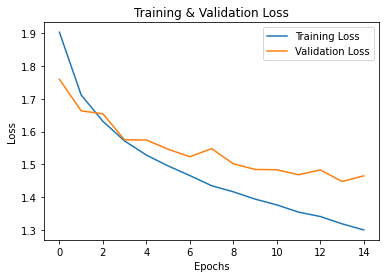

In [52]:
plt.plot(res_fcnn.history['loss'], label = "Training Loss") ##Plotting the training curve
plt.plot(res_fcnn.history['val_loss'], label = "Validation Loss") ##Plotting the validation curve
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3) Experiment on CNN

### a) Design CNN-1

In [54]:
#Building the CNN-1 model
model_cnn1 = tf.keras.Sequential()
model_cnn1.add(tf.keras.layers.Input(shape = (32, 32, 3))) ##Input layer
model_cnn1.add(tf.keras.layers.Conv2D(32, kernel_size = (5,5), activation = "relu", strides = 1, padding = "valid")) ##First 2D Convolution layer with 32 kernels
model_cnn1.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2)) ##2D Pooling layer using MaxPooling
model_cnn1.add(tf.keras.layers.Flatten()) ##Flattening layer to convert the values to pass to the output layer
model_cnn1.add(tf.keras.layers.Dense(100, activation = "relu")) ##Hidden layer with 100 neurons
model_cnn1.add(tf.keras.layers.Dense(10, activation = "softmax")) ##Output layer with 10 neurons

In [55]:
# Summary of CNN-1 model
model_cnn1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 100)                 │         627,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 630,742 (2.41 MB)

 Trainable params: 630,742 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

### b) Designing CNN-2

In [56]:
#Building the CNN-1 model
model_cnn2 = tf.keras.Sequential()
model_cnn2.add(tf.keras.layers.Input(shape = (32, 32, 3))) #Input Layer
model_cnn2.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", strides = 1, padding = "valid")) ##First 2D Convolution layer with 32 kernels
model_cnn2.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", strides = 1, padding = "valid")) ##Second 2D Convolution layer with 32 kernels
model_cnn2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2)) ##2D Pooling layer with MaxPooling
model_cnn2.add(tf.keras.layers.Flatten()) ##Flattening layer to convert the values to pass to the output layer
model_cnn2.add(tf.keras.layers.Dense(100, activation = "relu")) ##Hidden layer with 100 neurons
model_cnn2.add(tf.keras.layers.Dense(10, activation = "softmax")) ##Output layer with 10 neurons

In [57]:
# Summary of CNN-2 model
model_cnn2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │         627,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 638,454 (2.44 MB)

 Trainable params: 638,454 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

### c) Training and testing two model

#### Model-1

In [58]:
#Compiling the CNN-1
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_cnn1.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [59]:
#Defining the hyperparameters
batch_size = 32
epochs = 30

In [60]:
#Fitting CNN-1
res_cnn1 = model_cnn1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3972 - loss: 1.6644 - val_accuracy: 0.5558 - val_loss: 1.2671
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5776 - loss: 1.1904 - val_accuracy: 0.6062 - val_loss: 1.1321
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6373 - loss: 1.0344 - val_accuracy: 0.6202 - val_loss: 1.1125
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6807 - loss: 0.9162 - val_accuracy: 0.6380 - val_loss: 1.0775
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7072 - loss: 0.8312 - val_accuracy: 0.6496 - val_loss: 1.0780
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7416 - loss: 0.7431 - val_accuracy: 0.6504 - val_loss: 1.0437
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7657 - loss: 0.6670 - val_accuracy: 0.6564 - val_loss: 1.0608
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7911 - loss: 0

In [61]:
#Testing CNN-1
loss1, accuracy1 = model_cnn1.evaluate(x_test, y_test)
print("Accuracy: ", accuracy1)
print("Loss: ", loss1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6126 - loss: 3.1967
Accuracy:  0.6082000136375427
Loss:  3.224857807159424


#### Model-2

In [62]:
# Compiling the CNN-2
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_cnn2.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [63]:
#Fitting CNN-2
res_cnn2 = model_cnn2.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4016 - loss: 1.6553 - val_accuracy: 0.6144 - val_loss: 1.1106
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6291 - loss: 1.0633 - val_accuracy: 0.6352 - val_loss: 1.0648
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6851 - loss: 0.9070 - val_accuracy: 0.6734 - val_loss: 0.9582
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7206 - loss: 0.7996 - val_accuracy: 0.6768 - val_loss: 0.9504
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7500 - loss: 0.7064 - val_accuracy: 0.6714 - val_loss: 0.9875
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7791 - loss: 0.6216 - val_accuracy: 0.6856 - val_loss: 0.9537
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8140 - loss: 0.5433 - val_accuracy: 0.6654 - val_loss: 1.0258
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8394 -

In [64]:
#Testing CNN-2
loss2, accuracy2 = model_cnn2.evaluate(x_test, y_test)
print("Accuracy: ", accuracy2)
print("Loss: ", loss2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6343 - loss: 3.7176
Accuracy:  0.6327000260353088
Loss:  3.8171706199645996


### d) Plotting performance of CNN-1 and CNN-2

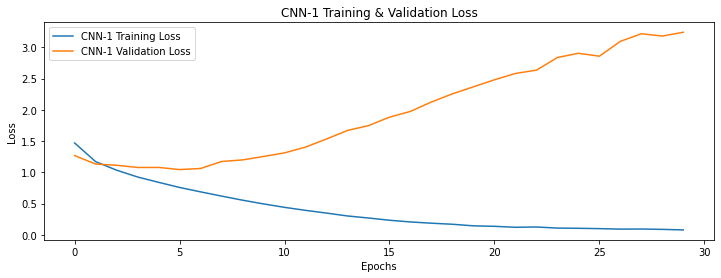

In [65]:
#CNN-1
plt.figure(figsize = (12, 4))
plt.plot(res_cnn1.history['loss'], label = "CNN-1 Training Loss")
plt.plot(res_cnn1.history['val_loss'], label = "CNN-1 Validation Loss")
plt.title('CNN-1 Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

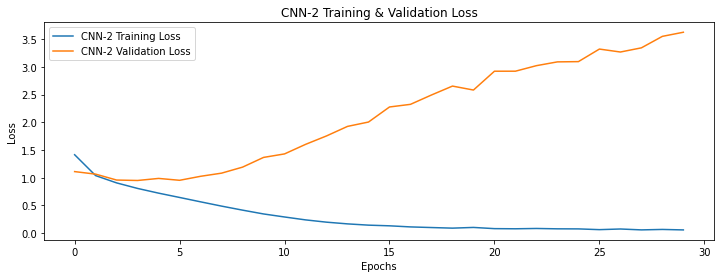

In [66]:
#CNN-2
plt.figure(figsize = (12, 4))
plt.plot(res_cnn2.history['loss'], label = "CNN-2 Training Loss")
plt.plot(res_cnn2.history['val_loss'], label = "CNN-2 Validation Loss")
plt.title('CNN-2 Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### e) Compare the performances of CNN-1 and CNN-2

In [67]:
print("CNN-1: Accuracy = ", accuracy1, ", Loss = ", loss1)
print("CNN-2: Accuracy = ", accuracy2, ", Loss = ", loss2)

CNN-1: Accuracy =  0.6082000136375427 , Loss =  3.224857807159424
CNN-2: Accuracy =  0.6327000260353088 , Loss =  3.8171706199645996


In [68]:
#Both the CNN models are inefficient classifiers

In [69]:
#Finding the predictions by each model
y_pred1 = model_cnn1.predict(x_test)
y_pred2 = model_cnn2.predict(x_test)
y_pred = model_fcnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [70]:
# Classification Report for CNN-1
print(classification_report(y_test, np.argmax(y_pred1, axis = 1), zero_division=0.0))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      1000
           1       0.77      0.68      0.72      1000
           2       0.49      0.49      0.49      1000
           3       0.40      0.48      0.44      1000
           4       0.57      0.56      0.56      1000
           5       0.50      0.44      0.47      1000
           6       0.69      0.69      0.69      1000
           7       0.70      0.65      0.68      1000
           8       0.76      0.70      0.73      1000
           9       0.64      0.73      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [71]:
# Classification Report for CNN-2
print(classification_report(y_test, np.argmax(y_pred2, axis = 1), zero_division=0.0))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67      1000
           1       0.79      0.74      0.77      1000
           2       0.48      0.50      0.49      1000
           3       0.45      0.42      0.44      1000
           4       0.57      0.58      0.58      1000
           5       0.55      0.50      0.53      1000
           6       0.69      0.73      0.71      1000
           7       0.68      0.69      0.68      1000
           8       0.71      0.79      0.75      1000
           9       0.75      0.69      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



### 4) Compare the performances of FCNN and CNN

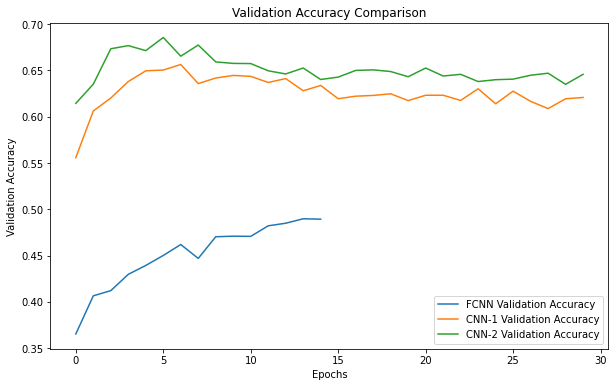

In [72]:
# Plot validation accuracy for all models
plt.figure(figsize=(10,6))
plt.plot(res_fcnn.history['val_accuracy'], label='FCNN Validation Accuracy')
plt.plot(res_cnn1.history['val_accuracy'], label='CNN-1 Validation Accuracy')
plt.plot(res_cnn2.history['val_accuracy'], label='CNN-2 Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [73]:
#Printing the test set accuracies of the 3 models
print("Test Set Accuracies:")
print(f"FCNN:  {model_fcnn.evaluate(x_test, y_test, verbose=0)[1]:.4f}")
print(f"CNN-1: {model_cnn1.evaluate(x_test, y_test, verbose=0)[1]:.4f}")
print(f"CNN-2: {model_cnn2.evaluate(x_test, y_test, verbose=0)[1]:.4f}")

Test Set Accuracies:
FCNN:  0.4881
CNN-1: 0.6082
CNN-2: 0.6327


In [74]:
#Printing the classification report for the 3 models for performance comparison
print(classification_report(y_test, np.argmax(y_pred1, axis = 1), zero_division=0.0))
print(classification_report(y_test, np.argmax(y_pred2, axis = 1), zero_division=0.0))
print(classification_report(y_test, np.argmax(y_pred, axis = 1), zero_division=0.0))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      1000
           1       0.77      0.68      0.72      1000
           2       0.49      0.49      0.49      1000
           3       0.40      0.48      0.44      1000
           4       0.57      0.56      0.56      1000
           5       0.50      0.44      0.47      1000
           6       0.69      0.69      0.69      1000
           7       0.70      0.65      0.68      1000
           8       0.76      0.70      0.73      1000
           9       0.64      0.73      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000

              precision    recall  f1-score   support

           0       0.65      0.68      0.67      1000
           1       0.79      0.74      0.77      1000
           2       0.48      0.50      0.49      1000
           3       0.45 

### 5) Compare the number of parameters in the FCNN and the CNN

In [75]:
#Printing the total number of parameters in each model
print("Total parameters in FCNN: ", model_fcnn.count_params())
print("Total parameters in CNN-1: ", model_cnn1.count_params())
print("Total parameters in CNN-2: ", model_cnn2.count_params())

Total parameters in FCNN:  1751510
Total parameters in CNN-1:  630742
Total parameters in CNN-2:  638454


In [76]:
#The model summary for each model
model_fcnn.summary()
model_cnn1.summary()
model_cnn2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,254,532 (20.04 MB)

 Trainable params: 1,751,510 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,503,022 (13.36 MB)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 100)                 │         627,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,892,228 (7.22 MB)

 Trainable params: 630,742 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,261,486 (4.81 MB)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │         627,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,915,364 (7.31 MB)

 Trainable params: 638,454 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,276,910 (4.87 MB)